In [7]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv("Company_Data (1).csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


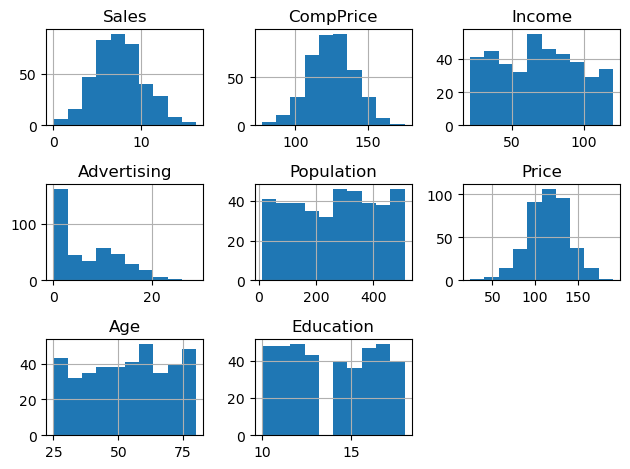

In [8]:
df.hist()
plt.tight_layout()


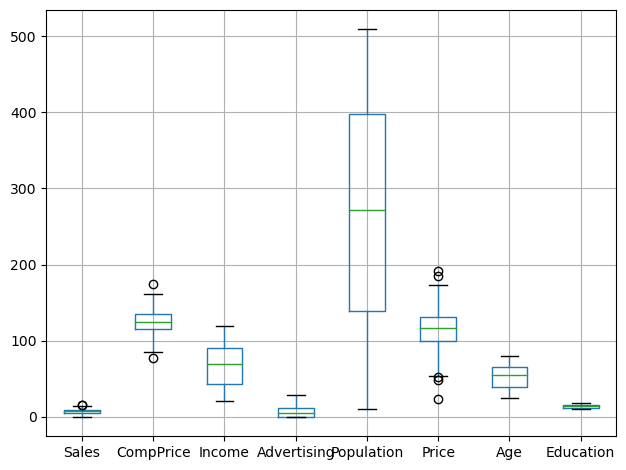

In [10]:
df.boxplot()
plt.tight_layout()

In [ ]:
df1=pd.Series(df['Sales'])
s=[]
for i in df1:
    if i>9:
        s.append('good')

    else:
        s.append('bad')

print(s)



In [ ]:
df2=pd.DataFrame(s)
df3=pd.concat([df2,df],axis=1)
df3=df3.rename({0:'o/p'},axis=1)
df3

In [ ]:
labelencoder = LabelEncoder()
df3.iloc[:, 7] = labelencoder.fit_transform(df3.iloc[:,7])
df3.iloc[:,-2]=labelencoder.fit_transform(df3.iloc[:,-2])
df3.iloc[:,-1]=labelencoder.fit_transform(df3.iloc[:,-1])
df3.iloc[:,0]=labelencoder.fit_transform(df3.iloc[:,0])

In [ ]:
df3

In [ ]:
array=df3.values

In [ ]:
X=array[:,2:10]
Y=array[:,0]


In [ ]:
num_trees = 100
max_features = 5
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

# Use Random Forest to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [ ]:
frd=pd.read_csv('/Fraud_check.csv')

In [ ]:
frd

In [ ]:
DF=pd.Series(frd['Taxable.Income'])
su=[]
for i in DF:
    if i<=30000:
        su.append("risky")
    else:
        su.append('good')
print(su)


In [ ]:
DF2=pd.DataFrame(su)
DF2=pd.concat([DF2,frd],axis=1)
DF2=DF2.rename({0:'o/p'},axis=1)

In [ ]:
DF2


In [ ]:
labelencoder=LabelEncoder()
DF2.iloc[:,0]=labelencoder.fit_transform(DF2.iloc[:,0])
DF2.iloc[:,1]=labelencoder.fit_transform(DF2.iloc[:,1])
DF2.iloc[:,2]=labelencoder.fit_transform(DF2.iloc[:,2])
DF2.iloc[:,-1]=labelencoder.fit_transform(DF2.iloc[:,-1])

In [ ]:
DF2

In [ ]:
DF2=DF2.values

In [ ]:
x=DF2[:,1:7]
y=DF2[:,0]

In [ ]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())